In [61]:
import torch
import numpy as np
from torchvision import models
from custom_classes import Save_Output
import torch.nn as nn


In [62]:
model_old = models.resnet101(pretrained=True)

In [63]:

# layers = []
# temp = 0
# for i in model_old.children():
#     temp = i
#     break
# kids = []
# saves = []
# for child in temp:
#     if "ReLU" in str(child):
#         child = torch.nn.ReLU()
#     kids.append(child)
#     layers.append(str(child))
# for i in range(len(kids)):
#     filename = "layer_" + str(i) + ".csv"
#     temp_save = Save_Output(filename)
#     temp_save.requires_grad_ = False
#     saves.append(temp_save)
# all_layers = []
# for i in range(len(kids)):
#     all_layers.append(saves[i])
#     all_layers.append(kids[i])
# temp2 = torch.nn.Sequential(
#    *all_layers
# )

# layers_temp = []
# for i in model_old.children():
#     layers_temp.append(i)
# model_new = torch.nn.Sequential(
#     temp2,
#     layers_temp[1],
#     layers_temp[2]
# )
 

In [64]:
new_sequences = []
layer_count = 0
for child in model_old.children():
    if("Sequential" in child._get_name()):
        new_bottlenecks = []
        for bottleneck in child.children():
            
            bottleneck_contents = []
            for i, layer in enumerate(bottleneck.children()):
                if("Conv" in layer._get_name()):
                    filename = "layer_" + str(layer_count) + ".csv"
                    bottleneck_contents.append(Save_Output(filename))
                    layer_count += 1
                    bottleneck_contents.append(layer)
                elif("ReLU" in layer._get_name()):
                    bottleneck_contents.append(nn.ReLU())
                elif("Seq" in layer._get_name()):
                    pass
                else:
                    bottleneck_contents.append(layer)
            new_bottlenecks.append(nn.Sequential(*bottleneck_contents))
        new_sequences.append(nn.Sequential(*new_bottlenecks))

sequence_count = 0
contents = []
for child in model_old.children():
    if("Sequential" in child._get_name()):
        contents.append(new_sequences[sequence_count])
        sequence_count += 1
    else:
        contents.append(child)
new_model = nn.Sequential(*contents)
print(new_model)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Sequential(
      (0): Save_Output()
      (1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Save_Output()
      (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): Save_Output()
      (7): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (8): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU()
    )
    (1): Sequential(
      (0): Save_Output()
      (1): Con

In [65]:
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torchvision

In [66]:
IMAGE_SIZE = 64
#Generates an object to store multiple transformations

composed = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


In [67]:
#Creating the two dataset objects and applying our transformations from above

# dataset_train = dsets.FashionMNIST(root= '.fashion/data', train=True, transform=composed,  download=True)
  
# dataset_val = dsets.FashionMNIST(root= '.fashion/data', train=False, transform=composed,  download=True)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=composed)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=composed)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [68]:
# #Data Loader for training data
# train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100 )

# #Data Loader for validation data
# test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100 )

In [69]:
model = new_model
correct=0
N_test=len(testset)

#Put model into validation mode (turns off Dropout if there are Dropout layers)
model.eval()
for x_test, y_test in testloader:
    #Make a prediction
    z = model(x_test)
    #Grab the index of the AI's highest probability guess (Each output of model(x) is a tensor of probabilities) 
    y_hat = torch.argmax(z, 1)
    #Update correct counter if the prediction was correct
    correct += (y_hat == y_test).sum().item()
accuracy = correct / N_test
print("Validation accuracy: " + str(accuracy))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (204800x1 and 2048x1000)

In [70]:
files = []
for i in range(layer_count):
    filename = "layer_" + str(i) +".csv"
    files.append(open(filename, 'r'))

data = []
for file in files:
    data.append( [float(s) for s in file.readline().split(sep=',') if '.' in s])


In [71]:
import pandas as pd
# my_data = {}
# for index, values in enumerate(data):
#     name = "layer " + str(index)
#     my_data[name] = np.array(values).mean()

new_data = [np.array(i).mean() for i in data]

df = pd.DataFrame(new_data)

Text(0, 0.5, 'sparcity')

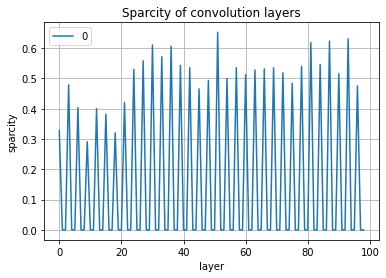

In [73]:
import matplotlib.pyplot as plt
df.plot()
plt.grid()
plt.title("Sparcity of convolution layers")
plt.xlabel("layer")
plt.ylabel("sparcity")

## Everything below this is currently broken

In [ ]:
conv_data = []
conv_names = []
for i,name in enumerate(layers):
    if("Conv" in name):
        conv_data.append(new_data[i])
        conv_names.append(name)


In [ ]:
conv_names

['Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))',
 'Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))',
 'Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))']

Text(0.5, 0, 'Layers')

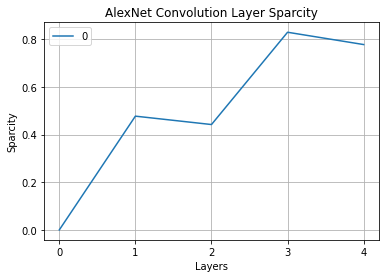

In [ ]:
df = pd.DataFrame(conv_data)

df.plot()
plt.locator_params(axis="both", integer=True, tight=True)
plt.grid()
plt.title("AlexNet Convolution Layer Sparcity")
plt.ylabel("Sparcity")
plt.xlabel("Layers")

In [74]:
import os
for file in files:
    file.close()
    os.remove(file.name)

In [ ]:

df = pd.DataFrame({"Sparcity":new_data}, index=layers)
df.style.set_caption("Sparcity of Data Entering Every Layer")

,Sparcity
"Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))",0.000000
ReLU(),0.000000
"MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)",0.716297
"Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))",0.477219
ReLU(),0.000000
"MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)",0.697644
"Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))",0.442039
ReLU(),0.000000
"Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))",0.829186
ReLU(),0.000000


In [ ]:
df = pd.DataFrame({"Sparcity": conv_data}, index=conv_names)
df.style.set_caption("Sparcity of Data Entering Convolutional Layers")

,Sparcity
"Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))",0.000000
"Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))",0.477219
"Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))",0.442039
"Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))",0.829186
"Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))",0.777528
